# 핵심키워드 추출
## 

- 핵심키워드 : 문서 내 단어 중 문서를 대표할 수 있는 단어
- 단어 빈도, 연어/동시발생 (연어: 함께 자주 등장하는 단어 묶음)

PageRank (구글 검색엔진 Model)
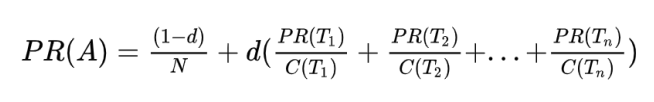
- 웹페이지를 중요도 순으로 보고자 함.
- 인터넷 상의 랭크 구조를 통해서, 주요 노드(웹페이지)를 정한다.
- PR(A) 페이지 랭크 값.
- T1에 있는 총 랭크 갯수 -> C(T1)
- T1의 페이지 랭크 값  -> PR(T1)

TextRank (키워드 추출, 문서요약 가능)

- 인터넷 웹상에 적용되었던 PageRank 모델을 텍스트 상에 적용한 것이 Textrank이다.
- 연쇄적으로 적용해 중요도를 결정한다.
- 그래프 내의 중요도를 결정하는 방법
- 투표와 추천
- 노드(단어) 사이에 연결 (A노드의 단어는 B노드의 단어를 추천한다.)
- 연결선(엣지)이 많을수록 중요도가 높아진다.
- 노드(단어) + 엣지(중요도) = 그래프
- 말뭉치를 토큰화시킨 후 , 윈도우 사이트마다 동시에 등장한 단어를 노드로 만들고, 노드와 노드는 엣지로 연결한다.-> 그래프를 그리고, 텍스트 랭크 수식에 적용(Score계산/키워드 추출)하고 특정 값에 수렴할 때까지 반복
- 
- 키워드 추출은 단어별로 되어있고, 문서요약은 '구'로 구성이 되어있다.
- 문서요약 = 문장과 문장간의 유사도를 가지고 랭킹을 결정한다.
- 유사도 결정 방법1. 문장간에 동시에 등장하는 단어가 얼마나 많은가?
- 유사도 결정 방법2. ???
- 그래프 기반의 주변 단어도 같이 사용해서 TEXT RANK를 사용하기에 중요도를 평가하기에 더욱 적합하다.
- 규칙기반에 의해서 텍스트랭크를 사용하기때문에 도메인에 대한 지식이 없어도 텍스트 추출이 가능하다.
- 특별한 말뭉치가 필요치 않고 분석을 위한 어느 말뭉치로도 가능하다.


Pagerank와 textrank의 차이점은 노드간에 화살표가 없어 유연하게 사용이 가능하다.


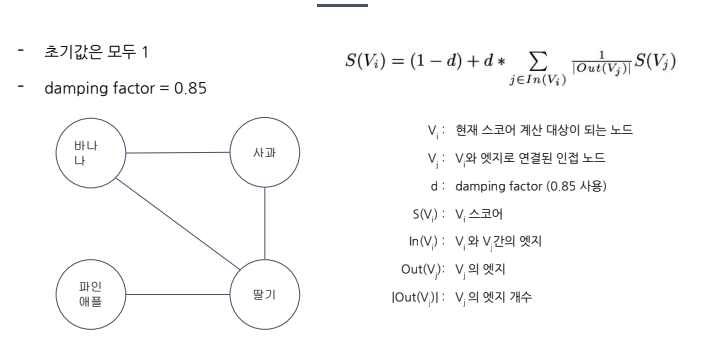


In [5]:
바나나 = (1-0.85) + 0.85 * (1/3 + 1/2)
print(바나나)
사과 = (1 -0.85) + 0.85 * (1/2 + 1/3)
print(사과)
딸기 = (1- 0.85) + 0.85 * (1 + 1/2 + 1/2)
print(딸기)
파인애플 = (1- 0.85) + 0.85 * (1/3)
print(파인애플)

0.8583333333333333
0.8583333333333333
1.85
0.43333333333333335


In [11]:
바나나 = (1-0.85) + 0.85 * (딸기/3 + 사과/2)
print(바나나)
사과 = (1 -0.85) + 0.85 * (바나나/2 + 딸기/3)
print(사과)
딸기 = (1- 0.85) + 0.85 * (파인애플 + 사과/2 + 바나나/2)
print(딸기)
파인애플 = (1- 0.85) + 0.85 * (딸기/3)
print(파인애플)

0.9928698437039524
0.9922685137161203
1.4784378075241804
0.5688907121318512


In [39]:

def score(num):
    
    바나나 = 1
    사과 = 1
    딸기 = 1
    파인애플 = 1
    
    for i in range(num):
        바나나 = (1-0.85) + 0.85 * (딸기/3 + 사과/2)        
        사과 = (1 -0.85) + 0.85 * (바나나/2 + 딸기/3)        
        딸기 = (1- 0.85) + 0.85 * (파인애플 + 사과/2 + 바나나/2)
        파인애플 = (1- 0.85) + 0.85 * (딸기/3)
    
        print('{}\n 바나나:{}\n 사과:{}\n 딸기:{}\n 파인애플:{}'.format(i,바나나,사과,딸기,파인애플))
        print('\n\n')
        

In [40]:
score(100)

0
 바나나:0.8583333333333333
 사과:0.798125
 딸기:1.7039947916666667
 파인애플:0.6327985243055556



1
 바나나:0.9720016493055555
 사과:1.0458992252604165
 딸기:1.5454866173502606
 파인애플:0.5878878749159071



2
 바나나:1.032395045651584
 사과:1.0266557693178304
 딸기:1.5248012900405223
 파인애플:0.582027032178148



3
 바나나:1.0183557341382259
 사과:1.014828219186894
 딸기:1.5088261575146018
 파인애플:0.5775007446291371



4
 바나나:1.0088027377835669
 사과:1.006241908187153
 딸기:1.4972696074723224
 파인애플:0.5742263887838247



5
 바나나:1.0018791997633647
 사과:1.0000250486832547
 딸기:1.4889017360560644
 파인애플:0.5718554918825516



6
 바나나:0.9968661375729347
 사과:0.9955236003510488
 딸기:1.4828428067178616
 파인애플:0.5701387952367274



7
 바나나:0.9932363253859232
 사과:0.9922642335257448
 딸기:1.4784557134886769
 파인애플:0.5688957854884584



8
 바나나:0.9906080847369
 사과:0.989904221501641
 딸기:1.4752791478165697
 파인애플:0.5679957585480281



9
 바나나:0.9887050526862255
 사과:0.9881954059396739
 딸기:1.4729790896818309
 파인애플:0.5673440754098521



10
 바나나:0.98732712